# Heart Disease Prediction

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

Reading the dataset

In [2]:
df=pd.read_csv("C:/Users/shapunya vemula/Downloads/Heart_Disease_Prediction.csv")

Performing EDA

In [3]:
df.shape

(270, 14)

In [4]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [8]:
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


<AxesSubplot:>

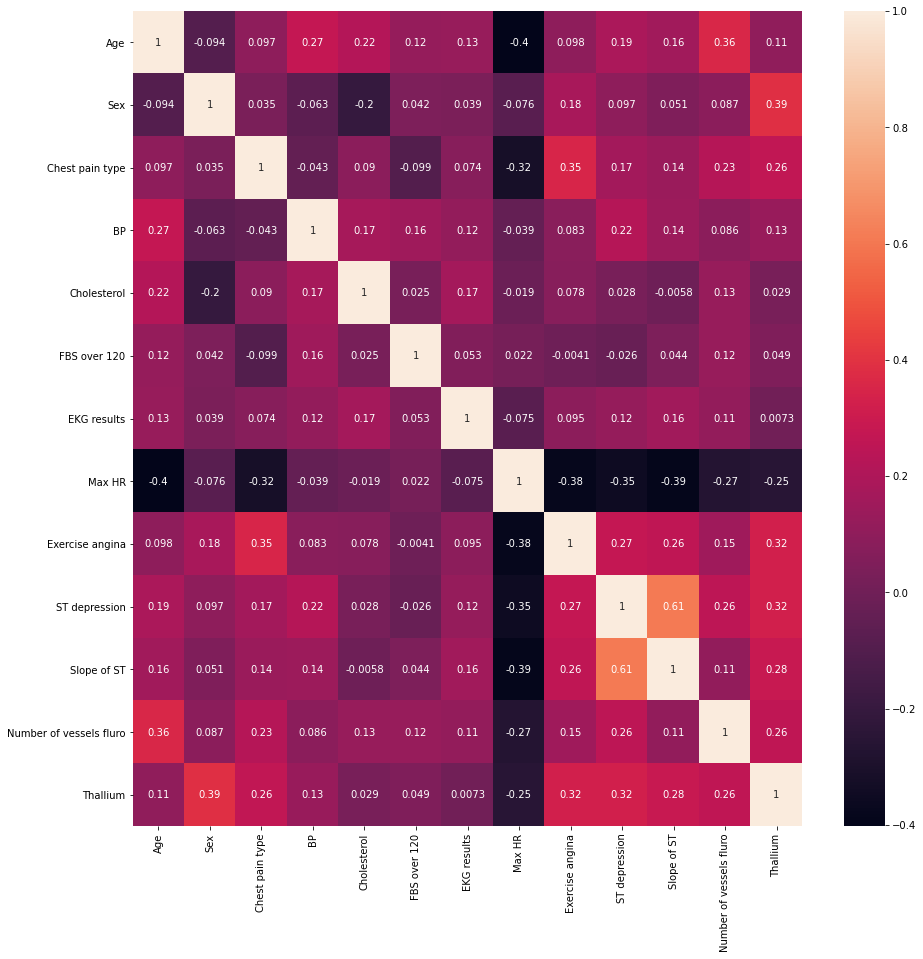

In [9]:
#Visualizing correlation
plt.figure(figsize = (15,15))
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot = True)

In [10]:
df = pd.get_dummies(df,drop_first= True)

In [14]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease_Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


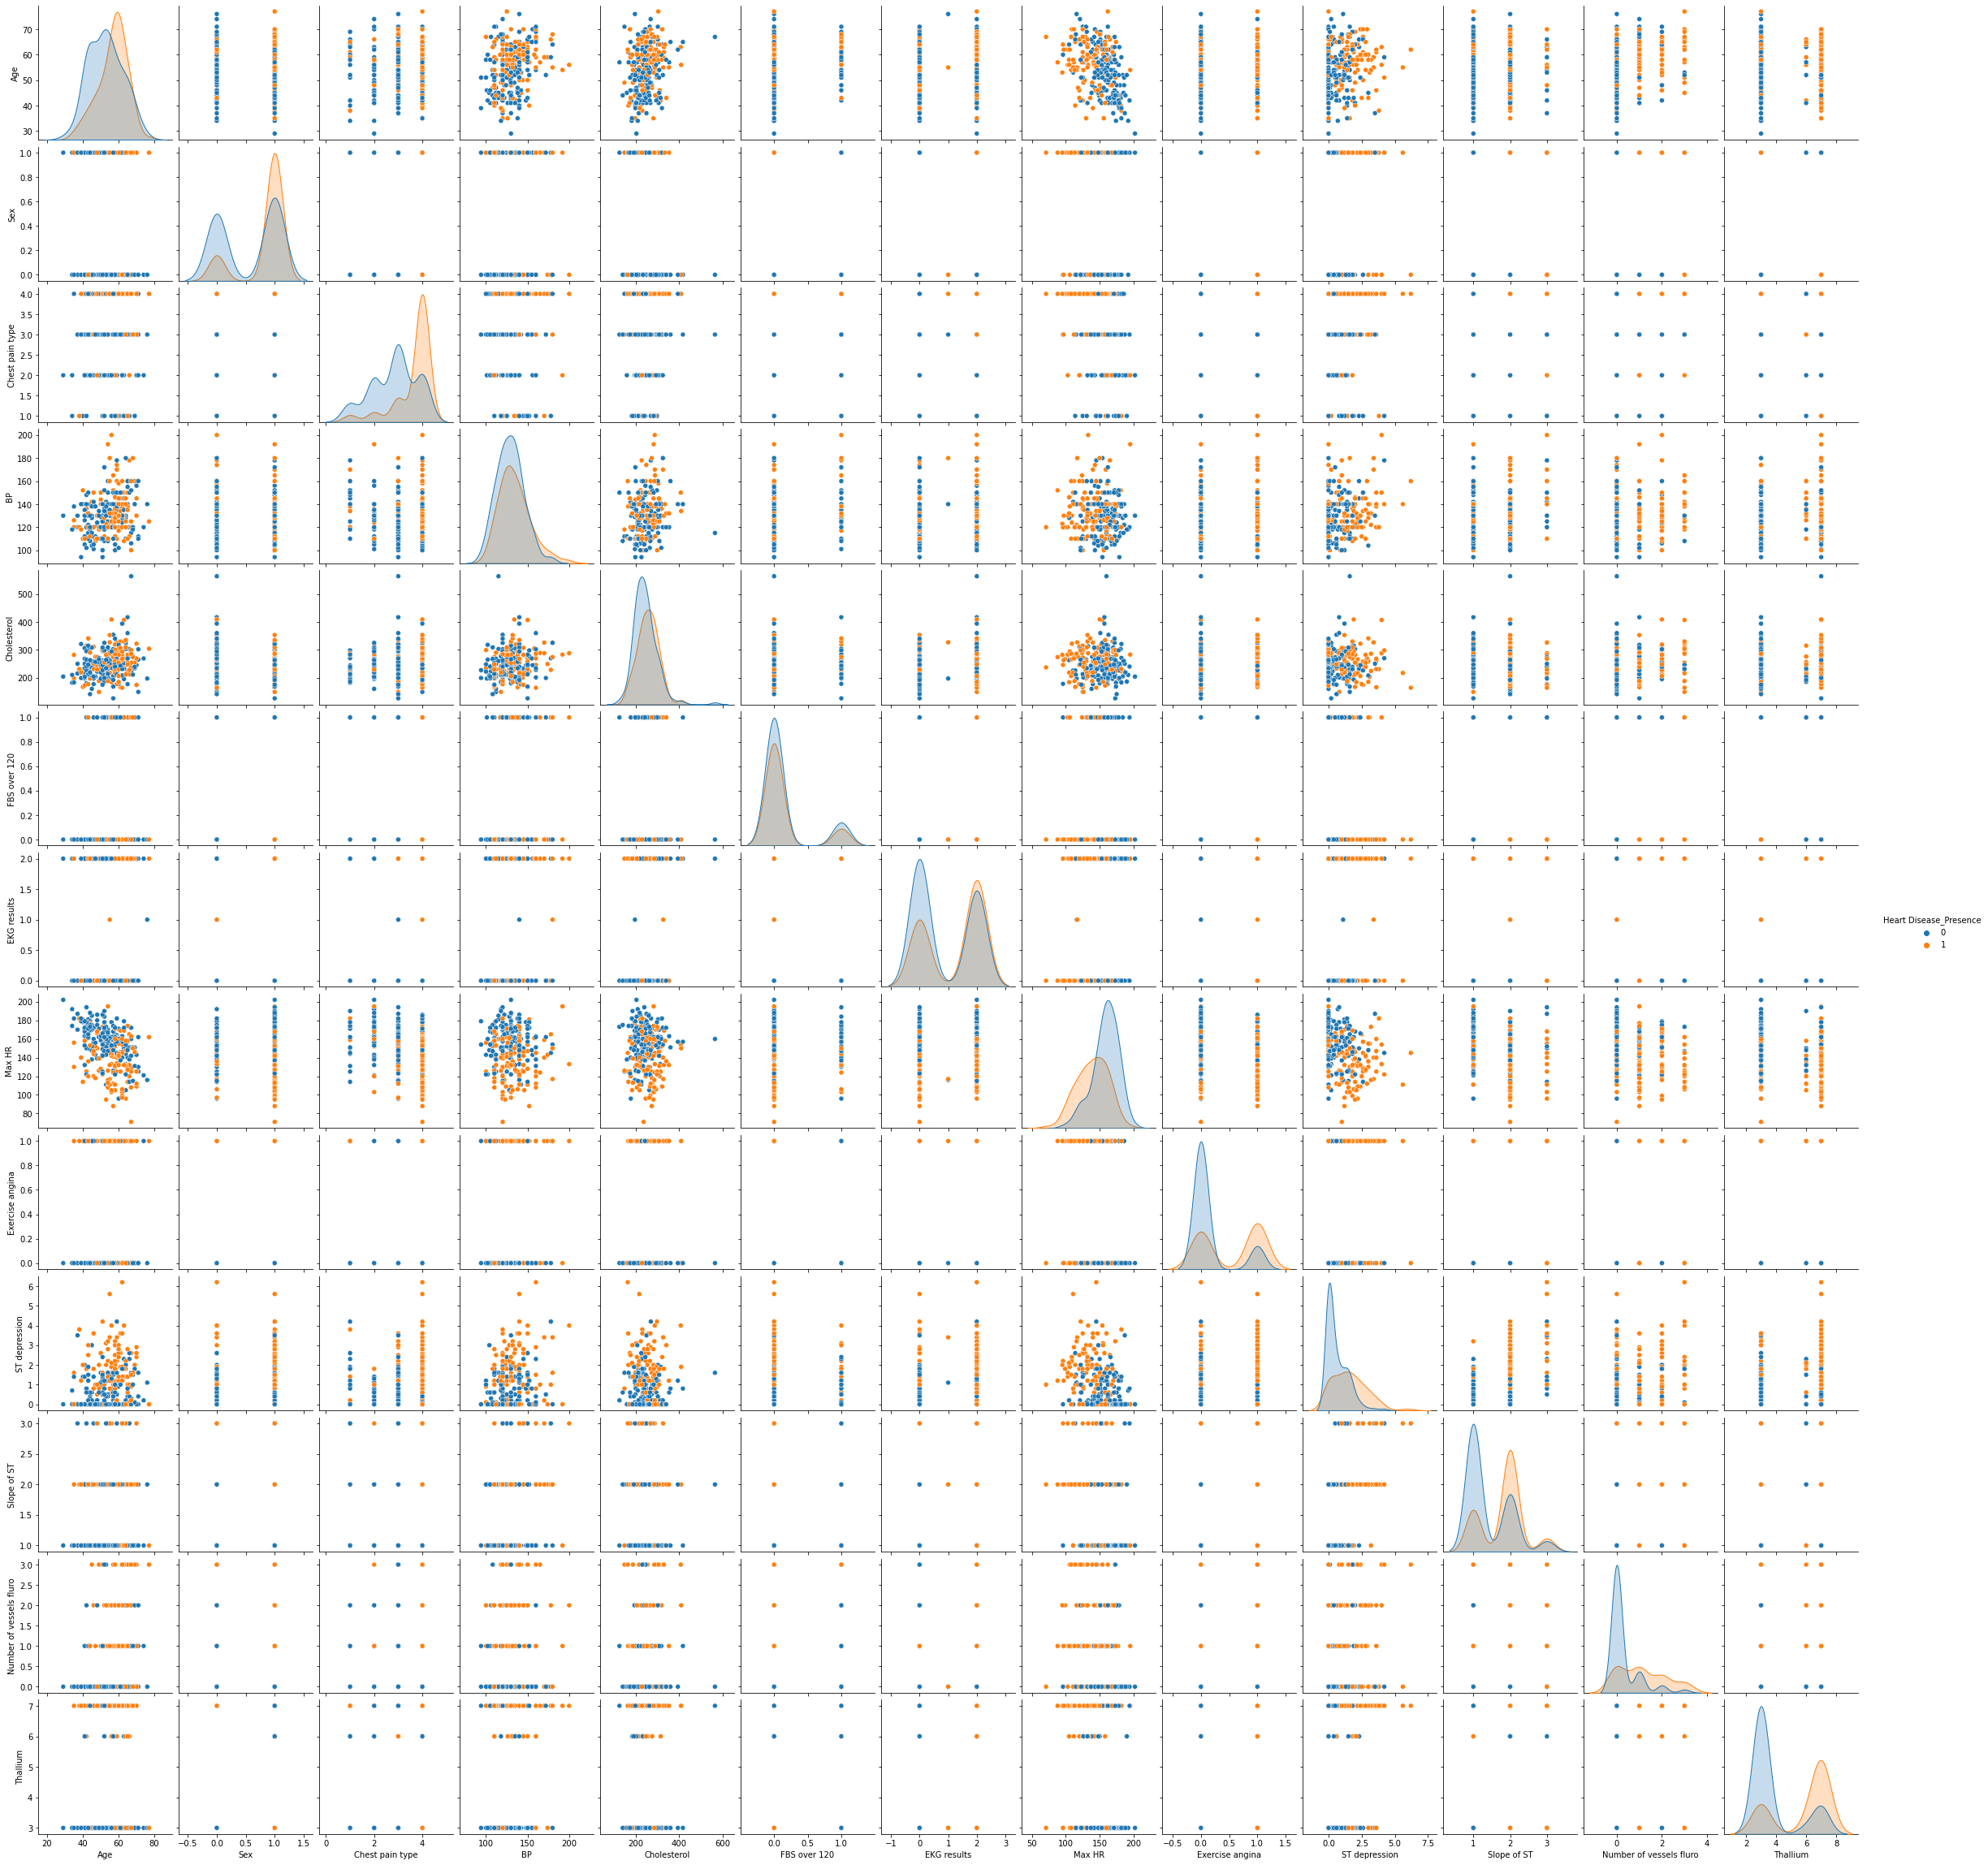

In [13]:
sns.pairplot(df,hue='Heart Disease_Presence')

# K-Nearest Neighbours

In [15]:
x = df.iloc[:, :-2]
y = df.iloc[:, -1]

In [16]:
x

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro
0,70,1,4,130,322,0,2,109,0,2.4,2,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0
3,64,1,4,128,263,0,0,105,1,0.2,2,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0


In [17]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease_Presence, Length: 270, dtype: uint8

Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [20]:
x

array([[ 1.71209356,  0.6894997 ,  0.87092765, ...,  1.18101235,
         0.67641928,  2.47268219],
       [ 1.38213977, -1.45032695, -0.18355874, ...,  0.48115318,
         0.67641928, -0.71153494],
       [ 0.2822938 ,  0.6894997 , -1.23804513, ..., -0.65611797,
        -0.95423434, -0.71153494],
       ...,
       [ 0.1723092 , -1.45032695, -1.23804513, ...,  0.21870599,
         0.67641928, -0.71153494],
       [ 0.2822938 ,  0.6894997 ,  0.87092765, ..., -0.56863558,
         0.67641928, -0.71153494],
       [ 1.38213977,  0.6894997 ,  0.87092765, ...,  0.39367078,
         0.67641928,  2.47268219]])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0, test_size = 0.25)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [23]:
from sklearn.neighbors import KNeighborsClassifier

Selecting the k value.

In [25]:
acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)

    acc_list.append(acc)
    err_list.append(1-acc)

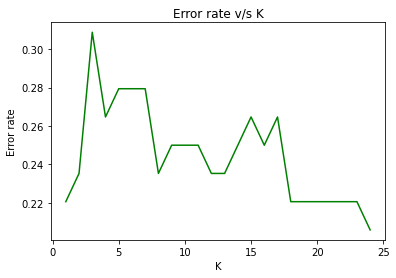

In [26]:
plt.plot(list(range(1,25)),err_list,c= 'g')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()


Model Building

In [34]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

Model Evaluation

In [35]:
confusion_matrix(y_test,y_pred)

array([[31,  9],
       [ 8, 20]], dtype=int64)

In [36]:
accuracy_score(y_test,y_pred)

0.75